In [3]:
#question 1
import pandas as pd 
from sklearn.decomposition import PCA

cc_data_frame = pd.read_csv('CC.csv')
print("Head : \n", cc_data_frame.head())
print(cc_data_frame.info(),'checking info')

# replacing nan values with their column mean
cc_data_frame["CREDIT_LIMIT"].fillna(cc_data_frame["CREDIT_LIMIT"].mean(),inplace=True)
cc_data_frame["MINIMUM_PAYMENTS"].fillna(cc_data_frame["MINIMUM_PAYMENTS"].mean(),inplace=True)

# excluding Customer ID column
x = cc_data_frame.iloc[:,1:]
y = cc_data_frame.iloc[:,-1]

# silhoeutte score before doing PCA
from sklearn.cluster import KMeans
cc_df_km = KMeans(n_clusters=2)
cc_df_km.fit(x)
cc_df_yCluster_km = cc_df_km.predict(x)
from sklearn import metrics
silhoeutte_score_before = metrics.silhouette_score(x, cc_df_yCluster_km)
print("Silhoeutte score before doing PCA :", silhoeutte_score_before)

# reducing features to 2 columns
pca = PCA(2)
cc_X_pca = pca.fit_transform(x)
cc_data_frame_2 = pd.DataFrame(data=cc_X_pca, columns = ['principal_component_1', 'principal_component_2' ])
final_cc_df = pd.concat([cc_data_frame_2,cc_data_frame[['TENURE']]],axis=1)
print(final_cc_df.head())

# k means and silhoeutte score on PCA result
km = KMeans(n_clusters=2)
km.fit(cc_X_pca)
y_cluster_kmeans = km.predict(cc_X_pca)
from sklearn import metrics
silhoeutte_score_after = metrics.silhouette_score(cc_X_pca, y_cluster_kmeans)
print("Silhoeutte score on PCA result :", silhoeutte_score_after)
# After doing the K means on PCA result, the silhoeutte score was improved 0.51163 from  0.59801

# scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_modified_array = scaler.transform(x)
X_Scaled = pd.DataFrame(X_modified_array, columns = x.columns)

# PCA after scaling, here also reducing two features
pca = PCA(2)
x_pca_after_scaling = pca.fit_transform(X_Scaled)
df_after_scaling = pd.DataFrame(data=X_Scaled , columns = ['principal component 1', 'principal component 2' ])
total_df_after_scaling = pd.concat([df_after_scaling,cc_data_frame[['TENURE']]],axis=1)
print(total_df_after_scaling.head())

# k means after scaling 
km_after_scaling = KMeans(n_clusters=2)
km_after_scaling.fit(X_Scaled)
y_cluster_kmeans_after_scaling = km_after_scaling.predict(X_Scaled)
from sklearn import metrics
silhoeutte_score_after_scaling = metrics.silhouette_score(X_Scaled, y_cluster_kmeans_after_scaling)
print("Silhoeutte score after scaling :", silhoeutte_score_after_scaling)

Head : 
   CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.0000

In [4]:
#question 2
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')


speech_dataframe = pd.read_csv('pd_speech_features.csv')
print("Head : \n", speech_dataframe.head())
print("Info: \n", speech_dataframe.info())
null_values = speech_dataframe.isnull().sum()
print("Null values: ", null_values)

x = speech_dataframe.iloc[:, :-1]
y = speech_dataframe.iloc[:,-1]

# scaling
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
scaling_x_values = scaler.transform(x)
scaledX = pd.DataFrame(scaling_x_values, columns = x.columns)

# Apply PCA (k=3)
pca = PCA(3)
speech_pca = pca.fit_transform(scaledX)
print("PCA: \n", speech_pca)
speech_df_ = pd.DataFrame(data = speech_pca, columns = ['principal_component_1', 'principal_component_2' , "principal_component_3"])
final_speech_data_frame = pd.concat([speech_df_, speech_dataframe[['class']]], axis = 1)
print("Speech features final DF: \n",final_speech_data_frame.head())

# doing svc on pca result
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# splitting dataset using train test split method
X_train, X_test, y_train, y_test = train_test_split(speech_pca, y, test_size = 0.2, random_state = 0)
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print("SVC Classification Report: ",classification_report(y_test, Y_pred))


Head : 
    id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2 

checking head : 
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
PCA final DF: 
          pc1       pc2      Species
0  74.547527  0.441426  Iris-setosa
1  73.549143  0.309342  Iris-setosa
2  72.557120  0.084528  Iris-setosa
3  71.551791  0.160353  Iris-setosa
4  70.552763  0.227636  Iris-setosa


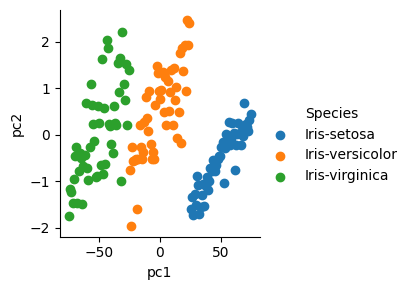

LDA final DF: 
          pc1       pc2      Species
0 -10.036763 -0.451330  Iris-setosa
1  -9.172930 -1.477234  Iris-setosa
2  -9.480989 -0.979693  Iris-setosa
3  -8.818119 -1.408602  Iris-setosa
4  -9.960200 -0.112546  Iris-setosa


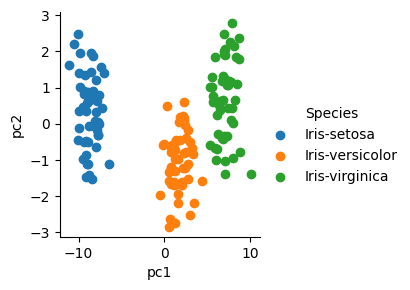

In [20]:
#question 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris_data_frame = pd.read_csv('Iris.csv')
print("checking head : \n", iris_data_frame.head())

x = iris_data_frame.iloc[:, :-1]
y = iris_data_frame.iloc[:, -1]

# PCA
pca = PCA(2)
x_iris_pca = pca.fit_transform(x)
# print("PCA: \n", x_iris_pca)
iris_pca = pd.DataFrame(data = x_iris_pca, columns = ['pc1', 'pc2'])
final_pca = pd.concat([iris_pca, iris_data_frame[['Species']]], axis = 1)
print("PCA final DF: \n",final_pca.head())
# visualization for PCA
sn.FacetGrid(final_pca, hue="Species").map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.show()


# LDA
lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit(x, y).transform(x)
# print("LDA \n",lda_analysis )
iris_lda = pd.DataFrame(data = iris_lda, columns = ['pc1', 'pc2'])
final_lda = pd.concat([iris_lda, iris_data_frame[['Species']]], axis = 1)
print("LDA final DF: \n",final_lda.head())
# visualization for LDA
sn.FacetGrid(final_lda, hue="Species").map(plt.scatter, 'pc1', 'pc2').add_legend()
plt.show()

# question 4
# LDA and PCA both are used for reduction of features, PCA is based on un supervised learning
# and it will not take class labels into consideration, where as LDA is supervised and will take target values
# into consideration as well and creates new linear axis, goes for maximum separability between categories and projects
# data points on that axis. From the below visualizations,we can say that LDA offers better feature reduction for 
# labelled data than PCA
